In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

data_path = r"../data/processed/all_data_1.csv"

In [35]:
# load data into dataframe
df = pd.read_csv(data_path)
df.reset_index()
df = df.drop(df.columns[0], axis=1)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [49]:
# let's remove the newlines!
df['text'] = df['text'].map(lambda x: x.replace('\n', ''))
df['text'] = df['text'].map(lambda x: x.replace('<Medien ausgeschlossen>', ''))


display(df.head(7))
print("Total messages: ", len(df))
print("Total Characters: ", df['text'].str.len().sum())

,timedate,sender,text
0,"26.05.19, 13:14",Nimrod W,Dan cookson can dew if
1,"26.05.19, 13:14",Nimrod W,It
2,"26.05.19, 13:15",Alex Friend,Gotcha
3,"26.05.19, 13:15",Alex Friend,Will deliver
4,"26.05.19, 13:15",Nimrod W,Amazing
5,"26.05.19, 13:15",Nimrod W,This will change my life
6,"26.05.19, 13:15",Nimrod W,I will start a yt channel called 'oxidised br...


Total messages:  166314
Total Characters:  4609926


In [50]:
# let's have a little look at some of the stats
df[['sender','text']].groupby(['sender']).count().sort_values(by='text', ascending=False).head(18)

,text
sender,
Nimrod W,56500
Yoav Wynne,17378
Annika Guez,16218
Eytan Merkier,8246
Walt Trustam,7179
Avishai Wynne,6738
Scott Fielding,6542
Judy Peritz-Wynne (Mum),6537
Jonathan Wynne (Dad),4795


In [51]:
message_lengths = df['text'].str.len().to_list()
mean_len = np.mean(message_lengths)
print("Mean Message Length: ", np.round(mean_len))
print("Minumum and Maximum: ", np.min(message_lengths), ", ", np.max(message_lengths))
print("Median length: ", np.median(message_lengths))

Mean Message Length:  28.0
Minumum and Maximum:  1 ,  2946
Median length:  20.0


In [52]:
print(df.loc[df['text'].str.len() > 200])

               timedate          sender                                               text
1703    12.09.20, 00:52        Nimrod W   https//www.reddit.com/r/Cooking/comments/g7rw...
2749    27.01.20, 12:37  Daniel Cordell   מה לעזאזל פשוט אמרת עלי, כלבה קטנה? אוודע לך ...
2974    23.12.20, 01:01   Eytan Merkier   Tangent which wasn't completed due to my drun...
2976    23.12.20, 01:07   Eytan Merkier   I think this is just my personality/ characte...
2984    23.12.20, 09:04        Nimrod W   https//www.mitgaisim.idf.il/%D7%9B%D7%AA%D7%9...
...                 ...             ...                                                ...
157998  04.03.22, 08:10   Eytan Merkier   Nimrooodddd, happy birthday, enjoy the day wi...
160046  21.10.22, 12:41        Nimrod W   its the pantry closet, we let the situation g...
160782  14.12.22, 18:08        Nimrod W   שלום נמרוד.שוחחתי עם רוזלי. היא מתקיימת מדמי ...
161777  29.07.22, 13:00        Nimrod W   https//www.google.com/url?sa=t&source=web&rct...

Here we see the distribution of message lengths. Plotting using a log scale we can see a that most messages there are a small minority of very long messages

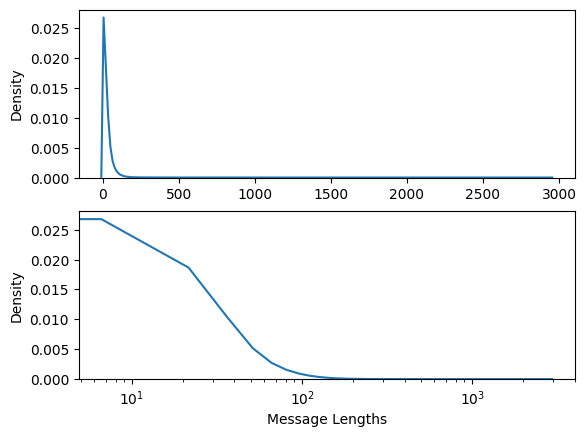

In [53]:
# let's have a look at the distributions of the message lengths
fig, ax = plt.subplots(2)
plt.xlabel("Message Lengths")
sns.kdeplot(message_lengths, ax=ax[0])
sns.kdeplot(message_lengths, ax=ax[1]) 
ax[1].set_xscale('log')
plt.show()

In [54]:
# let's have a look at the times that messages were sent at
# maybe hour of day vs number of messages?
# first, let's convert the datetime to a useable datetime object
def text_to_datetime(text):
    try:
        return datetime.strptime(text, "%d.%m.%y, %H:%M")
    except:
        return None
        
df_date = df.copy()
df_date['datetime'] = df_date.apply(lambda row: text_to_datetime(row['timedate']), axis=1)
print(df_date)

               timedate        sender                                          text            datetime
0       26.05.19, 13:14      Nimrod W                        Dan cookson can dew if 2019-05-26 13:14:00
1       26.05.19, 13:14      Nimrod W                                            It 2019-05-26 13:14:00
2       26.05.19, 13:15   Alex Friend                                        Gotcha 2019-05-26 13:15:00
3       26.05.19, 13:15   Alex Friend                                  Will deliver 2019-05-26 13:15:00
4       26.05.19, 13:15      Nimrod W                                       Amazing 2019-05-26 13:15:00
...                 ...           ...                                           ...                 ...
166309  16.01.23, 19:10      Nimrod W                                               2023-01-16 19:10:00
166310  16.01.23, 19:11  Inbar Hasson                                          Yeah 2023-01-16 19:11:00
166311  16.01.23, 19:11  Inbar Hasson                But isn't h

<AxesSubplot: xlabel='datetime'>

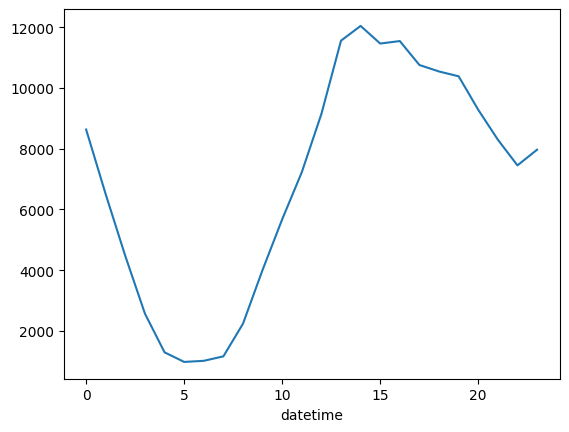

In [55]:
# here we have a plot of hour of the day versus number of messages sent. 
df_date.groupby(df_date['datetime'].dt.hour).count()['text'].plot()

In [56]:
# let's now look at the unique words in the data frame
unique = list(df['text'].str.split(" ", expand=True).stack().unique())

In [57]:
unique_word_counts = df['text'].str.split(' ', expand=True).stack().value_counts()

In [58]:
print(unique_word_counts.head(15))
print("No. Unique words: ", len(unique))

        181231
the      22003
to       18497
I        17119
a        16174
you      14894
it       11201
and       9785
is        9421
in        8906
of        7586
that      7394
for       6655
be        5661
on        5359
dtype: int64
No. Unique words:  71965


In [59]:
print(unique[:20])

['', 'Dan', 'cookson', 'can', 'dew', 'if', 'It', 'Gotcha', 'Will', 'deliver', 'Amazing', 'This', 'will', 'change', 'my', 'life', 'I', 'start', 'a', 'yt']


In [60]:
from wordcloud import WordCloud

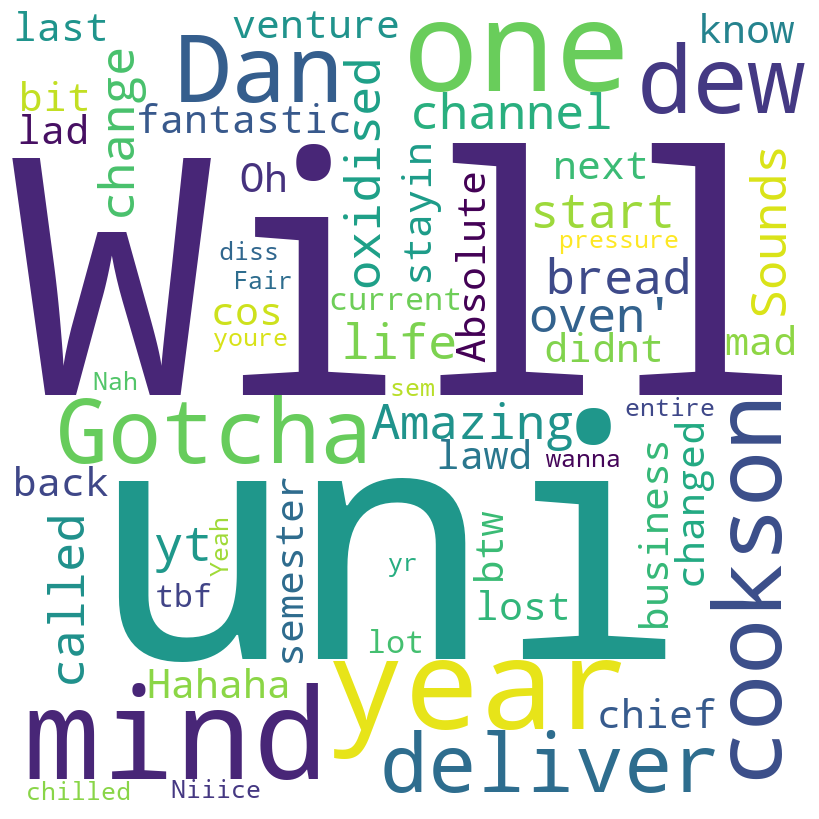

In [62]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(unique[:100]))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()